In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
data=pd.read_csv('Crop_recommendation.csv')
np.unique(data['label'],return_counts=True)

(array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100]))

In [53]:
scaler=MinMaxScaler()
X=data[data.columns[:-1]]
Y=data[data.columns[-1]]
# X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [54]:
KNN=KNeighborsClassifier(n_neighbors=8,weights='distance')
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
cross=cross_val_score(KNN,X,Y,cv=5)
print('Predictions using cross-validation for KNN:', cross,'mean: ',np.mean(cross))
print('Accuracy of KNN on test set:',np.mean(pred==y_test))

Predictions using cross-validation for KNN: [0.97727273 0.97727273 0.98863636 0.98181818 0.97727273] mean:  0.9804545454545455
Accuracy of KNN on test set: 0.9863636363636363


In [55]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
pred=LDA.predict(X_test)
cross=cross_val_score(LDA,X,Y,cv=5)
print('Predictions using cross-validation for LDA:', cross,'mean: ',np.mean(cross))
print('Accuracy of LDA on test set:',np.mean(pred==y_test))

Predictions using cross-validation for LDA: [0.96363636 0.95454545 0.97272727 0.97272727 0.96136364] mean:  0.9650000000000001
Accuracy of LDA on test set: 0.9681818181818181


In [56]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
cross=cross_val_score(LR,X,Y,cv=5)
print('Predictions using cross-validation for Logistic Regression(Closed-Form):',  cross,'mean: ',np.mean(cross))
print('Accuracy of Logistic Regression (Closed-Form) on test set:',np.mean(pred==y_test))

/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Predictions using cross-validation for Logistic Regression(Closed-Form): [0.95       0.96590909 0.94772727 0.96590909 0.94318182] mean:  0.9545454545454545
Accuracy of Logistic Regression (Closed-Form) on test set: 0.9431818181818182


/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# 'log_loss' gives logistic regression, a probabilistic classifier.
SGD=SGDClassifier(n_iter_no_change=200,loss='log_loss',random_state=42)
SGD.fit(X_train,y_train)
pred=SGD.predict(X_test)
cross=cross_val_score(SGD,X,Y,cv=5)
print('Predictions using cross-validation for Logistic Regression(using SGD):', cross,'mean: ',np.mean(cross))
print('Accuracy of Logistic Regression (using SGD) on test set:',np.mean(pred==y_test))

/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/py

Predictions using cross-validation for Logistic Regression(using SGD): [0.85681818 0.90681818 0.87727273 0.9        0.87045455] mean:  0.8822727272727272
Accuracy of Logistic Regression (using SGD) on test set: 0.8272727272727273


/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [58]:
# 'hinge' gives a linear SVM.
SGD=SGDClassifier(n_iter_no_change=200,loss='hinge',random_state=42)
SGD.fit(X_train,y_train)
pred=SGD.predict(X_test)
cross=cross_val_score(SGD,X,Y,cv=5)
print('Predictions using cross-validation for SVM(using SGD and with a linear classifier):', cross,'mean: ',np.mean(cross))
print('Accuracy of SVM (using SGD and with a linear classifier) on test set:',np.mean(pred==y_test))

/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/abdissad/.local/lib/py

Predictions using cross-validation for SVM(using SGD and with a linear classifier): [0.89545455 0.85909091 0.91590909 0.875      0.85227273] mean:  0.8795454545454545
Accuracy of SVM (using SGD and with a linear classifier) on test set: 0.8454545454545455


/home/abdissad/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [59]:
svc=SVC(random_state=42)
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
cross=cross_val_score(svc,X,Y,cv=5)
print('Predictions using cross-validation for SVM(using rbf kernel):', cross,'mean: ',np.mean(cross))
print('Accuracy of SVC (using rbf kernel) on test set:',np.mean(pred==y_test))

Predictions using cross-validation for SVM(using rbf kernel): [0.98409091 0.97954545 0.97954545 0.97272727 0.975     ] mean:  0.9781818181818182
Accuracy of SVC (using rbf kernel) on test set: 0.9840909090909091


In [60]:
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
pred=DTC.predict(X_test)
cross=cross_val_score(DTC,X,Y,cv=5)
print('Predictions using cross-validation for Decision tree classifier:', cross,'mean: ',np.mean(cross))
print('Accuracy of Decision tree classifier on test set:',np.mean(pred==y_test))

Predictions using cross-validation for Decision tree classifier: [0.98409091 0.98409091 0.99090909 0.99090909 0.98409091] mean:  0.9868181818181819
Accuracy of Decision tree classifier on test set: 0.9795454545454545


In [61]:
RFC=RandomForestClassifier(random_state=42)
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)
cross=cross_val_score(RFC,X,Y,cv=5)
print('Predictions using cross-validation for random forest classifier:', cross,'mean: ',np.mean(cross))
print('Accuracy of random forest classifier on test set:',np.mean(pred==y_test))

Predictions using cross-validation for random forest classifier: [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636] mean:  0.9945454545454545
Accuracy of random forest classifier on test set: 0.9954545454545455


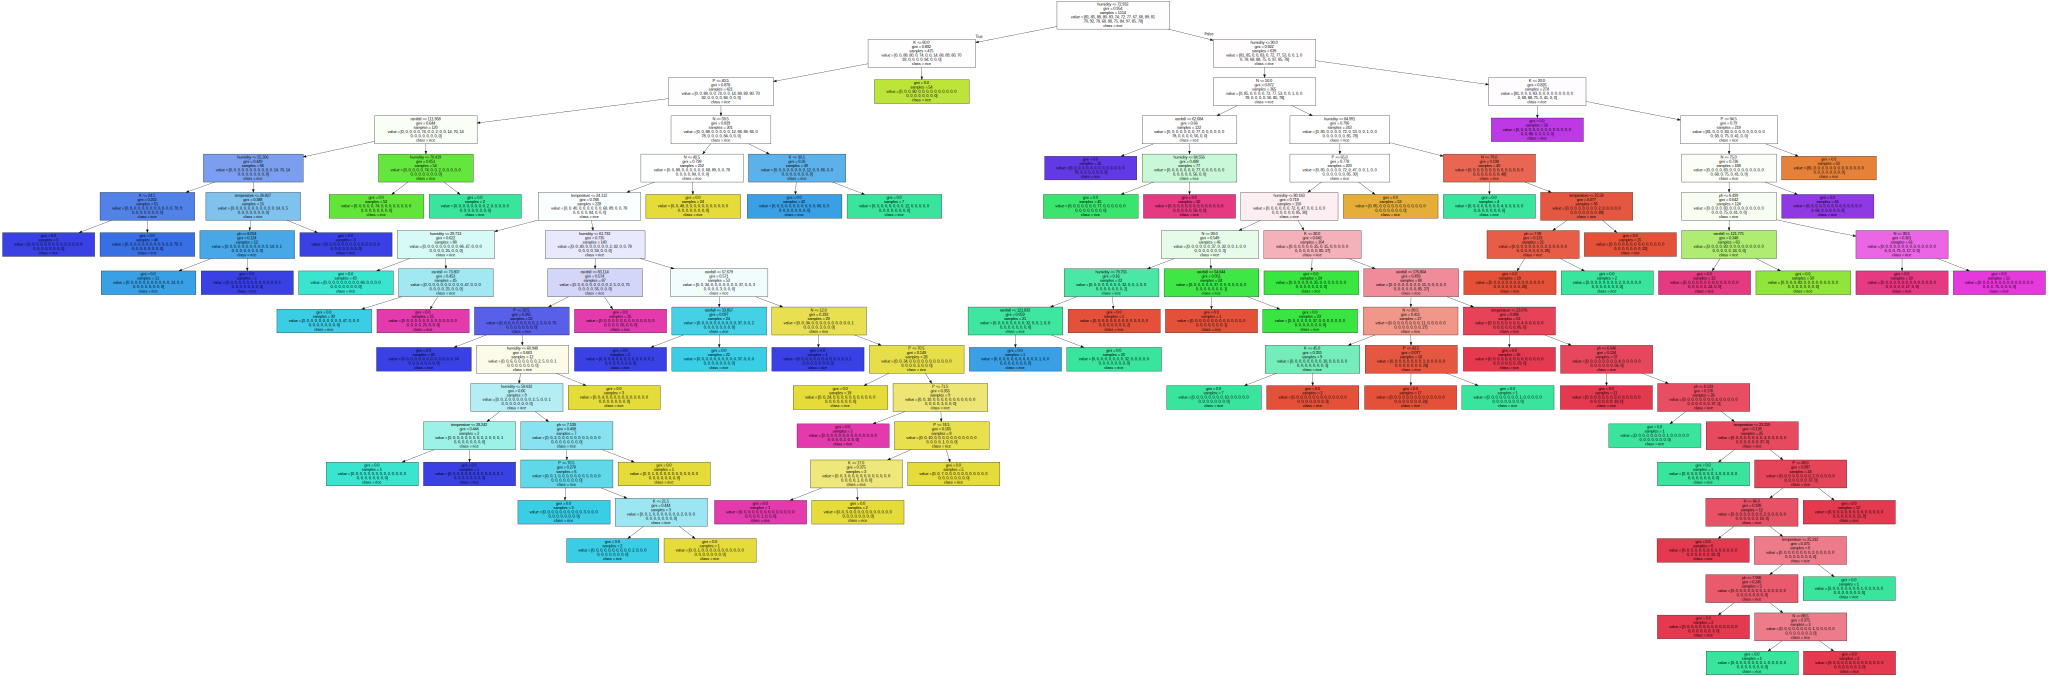

In [62]:

# Get the first tree
tree_in_forest = RFC.estimators_[0]

# DOT data
dot_data = tree.export_graphviz(tree_in_forest, out_file=None, 
                                feature_names=data.columns.to_list()[:-1], 
                                class_names=data['label'].to_list(),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

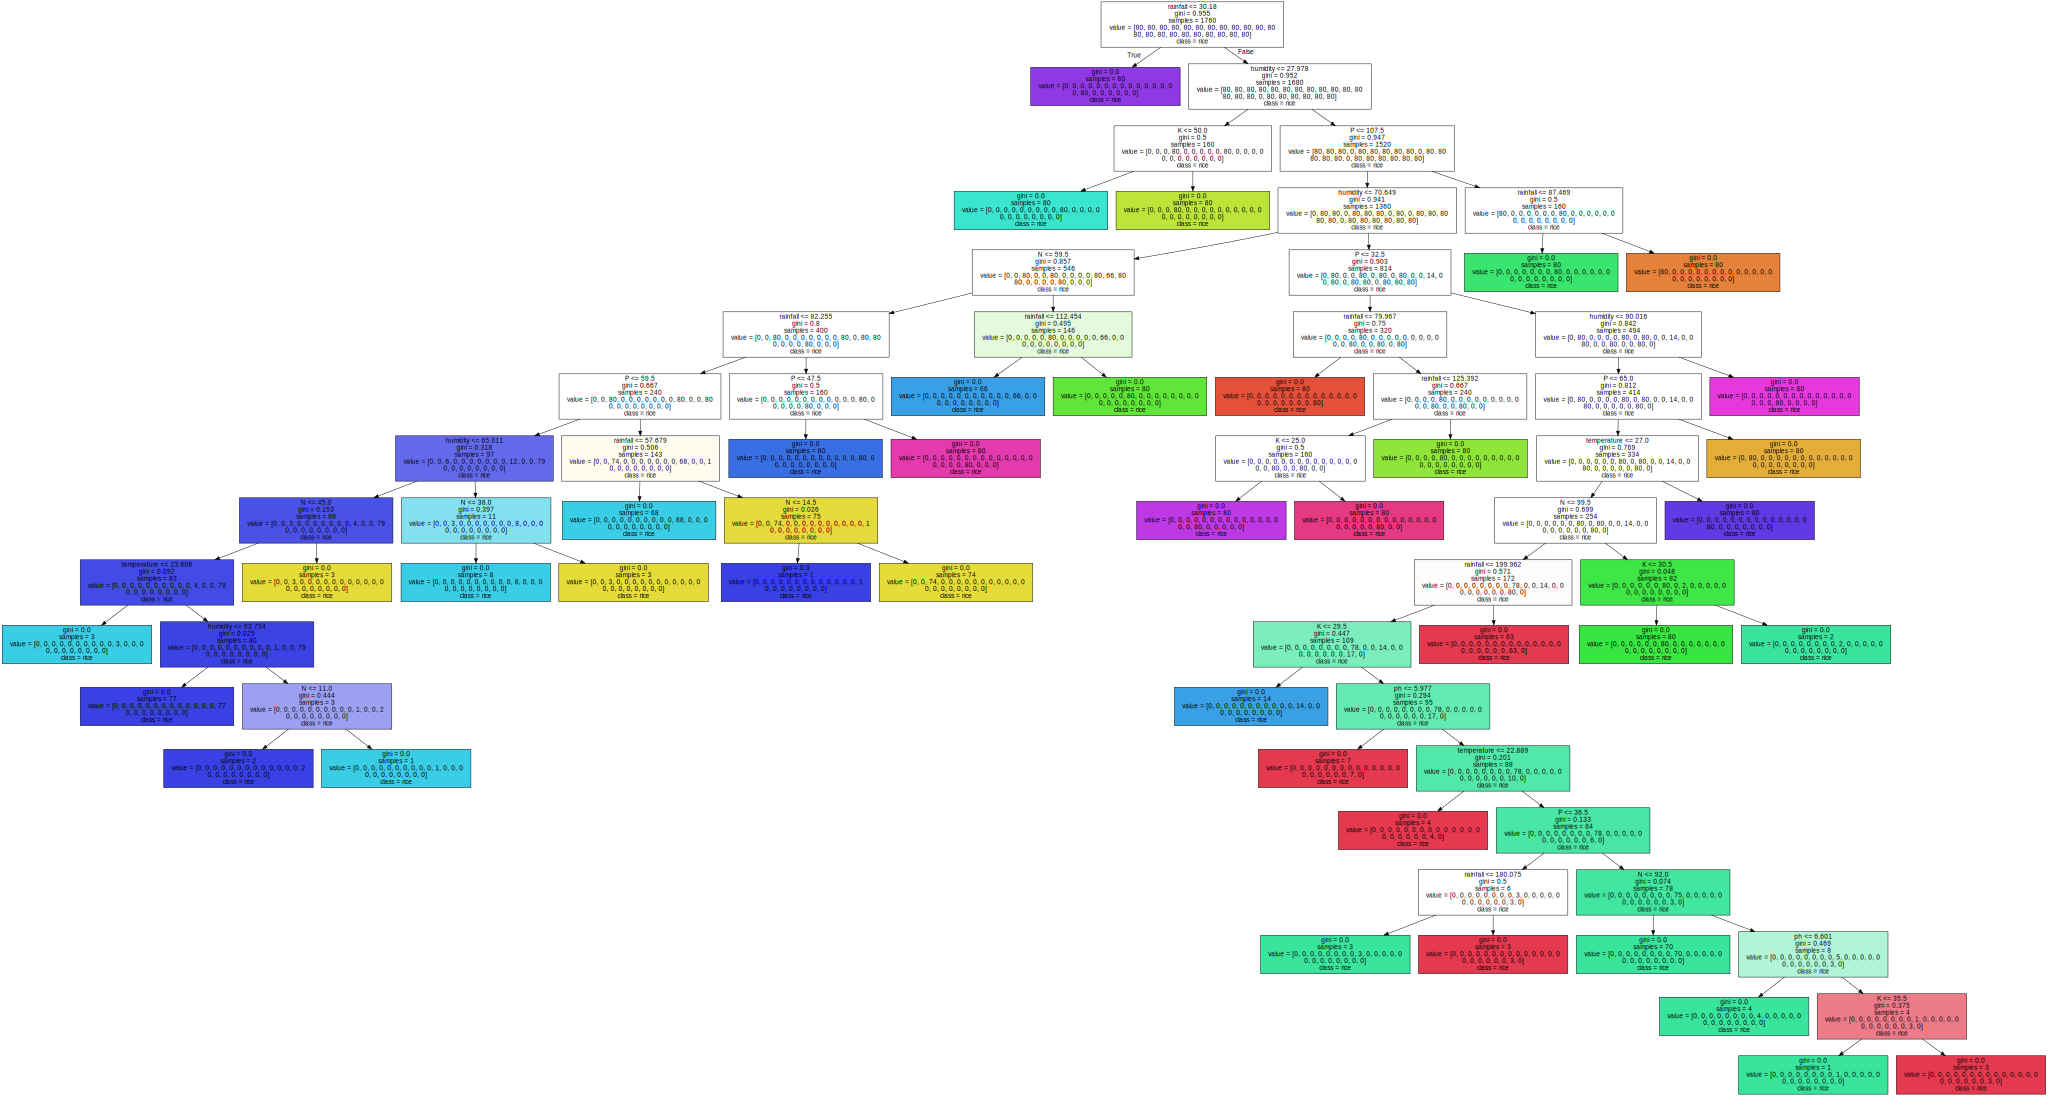

In [63]:
# DOT data
dot_data = tree.export_graphviz(DTC, out_file=None, 
                                feature_names=data.columns.to_list()[:-1], 
                                class_names=data['label'].to_list(),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [64]:
import joblib
# Save the model
joblib.dump(RFC, "crop_recommendation.joblib")

# Load the model
loaded_rf = joblib.load("crop_recommendation.joblib")

In [65]:
loaded_rf.predict(X_test)
np.mean(cross_val_score(RFC,X_test,y_test,cv=5))

0.9818181818181818